In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load weekly sales data
walmart_data = pd.read_csv('Walmart_DataSet.csv')

In [3]:
# Display the data types of each column
print(walmart_data.dtypes)

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [4]:
walmart_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
# Check for missing values
missing_values = walmart_data.isnull().sum()
missing_values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [12]:
# Check for non-numeric values
non_numeric_values = walmart_data.apply(pd.to_numeric, errors='coerce').isna().any()

if non_numeric_values.any():
    raise ValueError("DataFrame contains non-numeric values.")

ValueError: DataFrame contains non-numeric values.

In [13]:
# Convert to numeric if necessary
walmart_data = walmart_data.apply(pd.to_numeric, errors='coerce')

In [14]:
# Define your cap_outliers function
def cap_outliers(series):
    lower, upper = series.quantile([0.01, 0.99])
    return series.clip(lower, upper)

In [15]:
# Apply cap_outliers function
walmart_data = walmart_data.apply(cap_outliers)

In [16]:
#Exploratory Data Analysis (EDA)
# Descriptive statistics
print(walmart_data.describe())

             Store  Date  Weekly_Sales  Holiday_Flag  Temperature  \
count  6435.000000   0.0  6.435000e+03   6435.000000  6435.000000   
mean     23.000000   NaN  1.042888e+06      0.069930    60.680736   
std      12.988182   NaN  5.508951e+05      0.255049    18.290814   
min       1.000000   NaN  2.531031e+05      0.000000    18.523600   
25%      12.000000   NaN  5.533501e+05      0.000000    47.460000   
50%      23.000000   NaN  9.607460e+05      0.000000    62.670000   
75%      34.000000   NaN  1.420159e+06      0.000000    74.940000   
max      45.000000   NaN  2.404035e+06      1.000000    93.190000   

        Fuel_Price          CPI  Unemployment  
count  6435.000000  6435.000000   6435.000000  
mean      3.357792   171.571955      7.998754  
std       0.456527    39.347287      1.872008  
min       2.565000   126.106903      4.156000  
25%       2.933000   131.735000      6.891000  
50%       3.445000   182.616521      7.874000  
75%       3.735000   212.743293      8.622

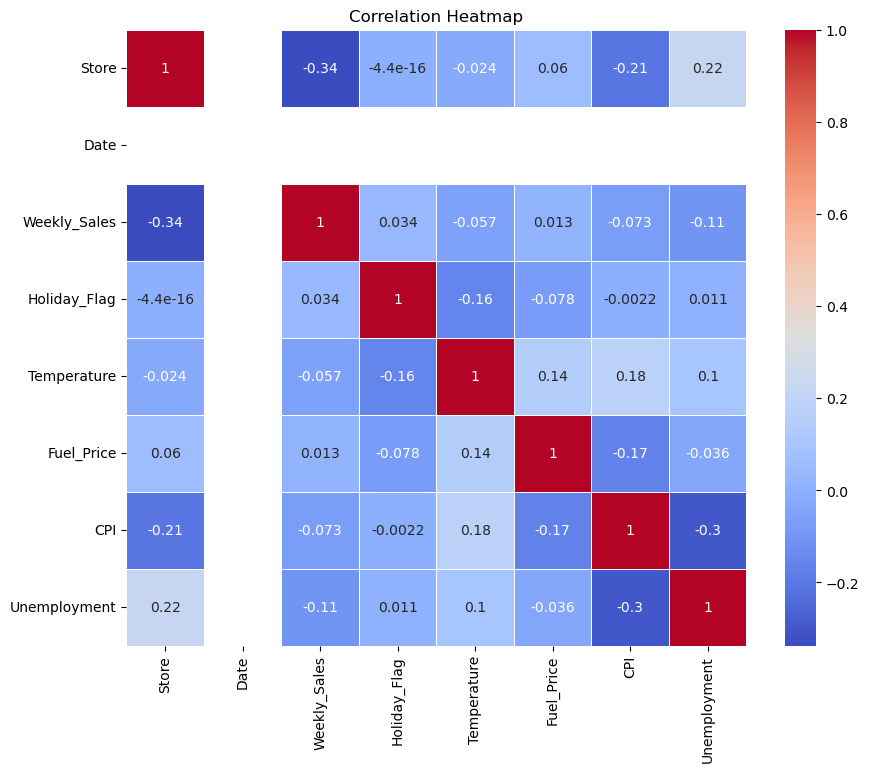

In [17]:
# Correlation analysis
correlation_matrix = walmart_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [18]:
#Statistical Analysis
# Unemployment rate vs Weekly Sales
unemployment_corr = walmart_data[['Weekly_Sales', 'Unemployment']].corr()
print("Correlation between Weekly Sales and Unemployment:", unemployment_corr)

Correlation between Weekly Sales and Unemployment:               Weekly_Sales  Unemployment
Weekly_Sales       1.00000      -0.10642
Unemployment      -0.10642       1.00000


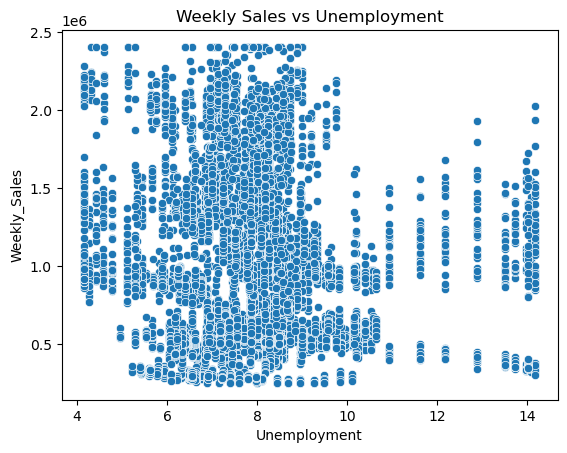

In [19]:
# Scatter plot
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=walmart_data)
plt.title('Weekly Sales vs Unemployment')
plt.show()

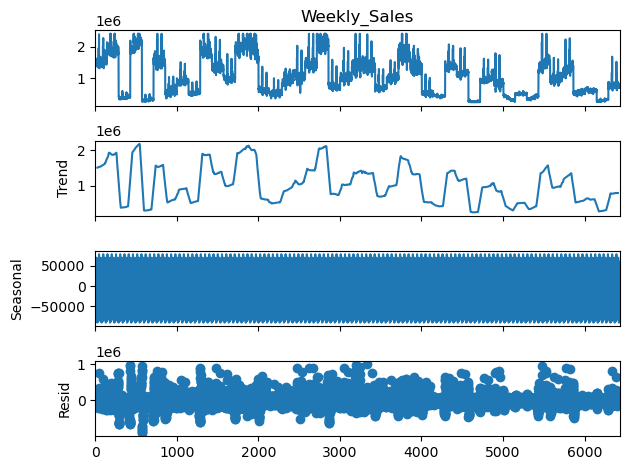

In [20]:
# Seasonal trend analysis
decompose_result = seasonal_decompose(walmart_data['Weekly_Sales'], model='additive', period=52)
decompose_result.plot()
plt.show()

In [22]:
#Merge the three columns based on the common key_column
merged_columns = pd.merge(walmart_data[['Weekly_Sales', 'Unemployment']], walmart_data['Store'], left_index=True, right_index=True)

In [23]:
## Display the merged columns
print(merged_columns)

      Weekly_Sales  Unemployment  Store
0       1643690.90         8.106      1
1       1641957.44         8.106      1
2       1611968.17         8.106      1
3       1409727.59         8.106      1
4       1554806.68         8.106      1
...            ...           ...    ...
6430     713173.95         8.684     45
6431     733455.07         8.667     45
6432     734464.36         8.667     45
6433     718125.53         8.667     45
6434     760281.43         8.667     45

[6435 rows x 3 columns]


In [24]:
# Calculate correlation between weekly sales and unemployment rate for each store
correlation_by_store = merged_columns.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['Unemployment']))

In [25]:
# Sort stores based on correlation coefficient (absolute value) to identify the most affected stores
most_affected_stores = correlation_by_store.abs().sort_values(ascending=False)

In [26]:
# Display the most affected stores
print("Most affected stores and their correlation coefficients:")
print(most_affected_stores)

Most affected stores and their correlation coefficients:
Store
36    0.833734
38    0.783820
44    0.782746
4     0.565979
35    0.483865
39    0.401174
42    0.356355
41    0.350630
13    0.315077
14    0.274496
17    0.263600
3     0.230413
37    0.221287
21    0.218367
5     0.207043
43    0.201954
30    0.201862
33    0.194352
9     0.191534
10    0.187215
7     0.165382
18    0.139179
28    0.134018
40    0.112619
19    0.107751
20    0.106777
32    0.099455
1     0.097955
23    0.087874
29    0.084682
15    0.078905
16    0.070864
26    0.066899
31    0.064738
2     0.054770
8     0.052580
6     0.040680
22    0.039043
11    0.020339
34    0.017010
12    0.014076
24    0.012261
27    0.011726
25    0.004958
45    0.004041
dtype: float64


In [27]:
# Temperature vs Weekly Sales
temp_corr = walmart_data[['Weekly_Sales', 'Temperature']].corr()
print("Correlation between Weekly Sales and Temperature:", temp_corr)

Correlation between Weekly Sales and Temperature:               Weekly_Sales  Temperature
Weekly_Sales      1.000000    -0.057056
Temperature      -0.057056     1.000000


In [34]:
# Calculate correlation coefficient
correlation_coefficient = merged_data['Temperature'].corr(merged_data['Weekly_Sales'])
print("Correlation coefficient between temperature and weekly sales:", correlation_coefficient)

Correlation coefficient between temperature and weekly sales: -0.0570560141231818


In [28]:
# Merge weekly sales and temperature data based on common column 
merged_data = pd.concat([walmart_data['Weekly_Sales'], walmart_data['Temperature']], axis=1)

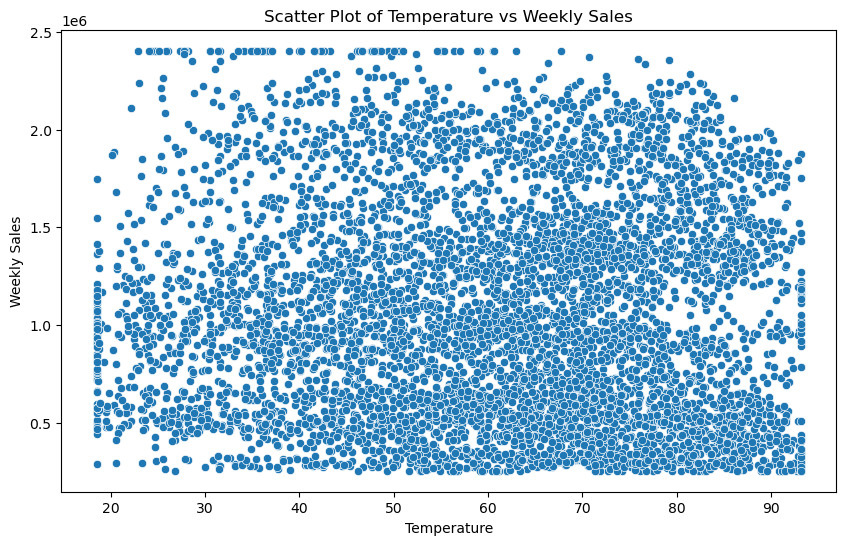

In [30]:
#Visualize relationship between temperature and weekly sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Temperature', y='Weekly_Sales')
plt.title('Scatter Plot of Temperature vs Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

In [32]:
# CPI vs Weekly Sales
cpi_corr = walmart_data[['Weekly_Sales', 'CPI']].corr()
print("Correlation between Weekly Sales and CPI:", cpi_corr)

Correlation between Weekly Sales and CPI:               Weekly_Sales       CPI
Weekly_Sales      1.000000 -0.072985
CPI              -0.072985  1.000000


In [36]:
# Merge weekly sales and CPI data based on common column
merged_data = pd.concat([walmart_data['Weekly_Sales'], walmart_data['CPI']], axis=1)

In [37]:
# Calculate correlation coefficient
correlation_coefficient = merged_data['CPI'].corr(merged_data['Weekly_Sales'])
print("Correlation coefficient between CPI and weekly sales:", correlation_coefficient)

Correlation coefficient between CPI and weekly sales: -0.07298513992839589


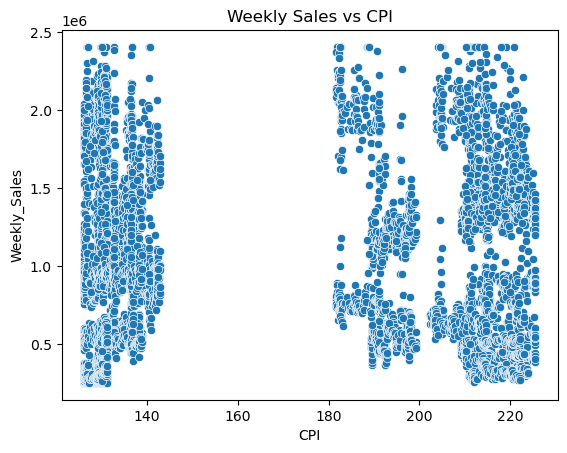

In [33]:
# Scatter plot
sns.scatterplot(x='CPI', y='Weekly_Sales', data=walmart_data)
plt.title('Weekly Sales vs CPI')
plt.show()

In [38]:
# Performance Analysis
# Top performing stores
top_stores = walmart_data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
print("Top Performing Stores:\n", top_stores.head())

Top Performing Stores:
 Store
20    2.964764e+08
4     2.952647e+08
14    2.846980e+08
13    2.825105e+08
2     2.728314e+08
Name: Weekly_Sales, dtype: float64


In [39]:
# Worst performing stores
worst_stores = walmart_data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=True)
print("Worst Performing Store:\n", worst_stores.head(1))

Worst Performing Store:
 Store
33    3.808097e+07
Name: Weekly_Sales, dtype: float64


In [40]:
# Significant difference between highest and lowest performing stores
max_sales = top_stores.max()
min_sales = worst_stores.min()
print(f"Difference between highest and lowest performing stores: {max_sales - min_sales}")

Difference between highest and lowest performing stores: 258395376.31960002


In [45]:
# Reset index to convert Series to DataFrame
top_stores = top_stores.reset_index()

In [46]:
top_stores.columns = ['Store', 'Total_Weekly_Sales']

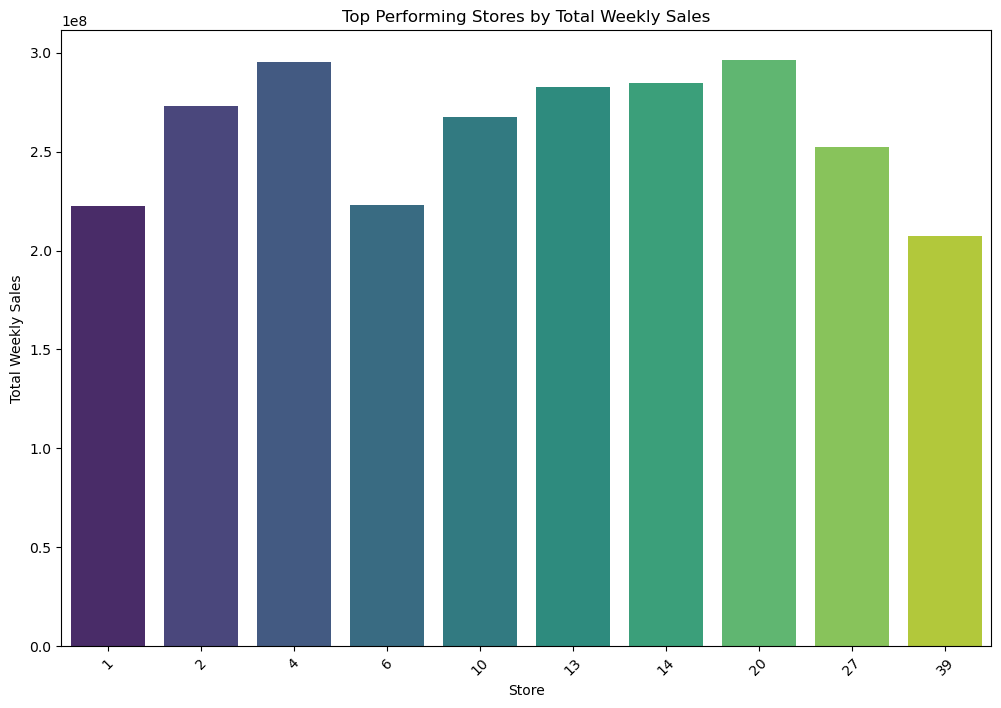

In [48]:
#Visualize the top performing store. 
plt.figure(figsize=(12, 8))
sns.barplot(data=top_stores.head(10), x='Store', y='Total_Weekly_Sales', palette='viridis')
plt.title('Top Performing Stores by Total Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=45)
plt.show()

In [49]:
# Reset index to convert Series to DataFrame
worst_stores = top_stores.reset_index()

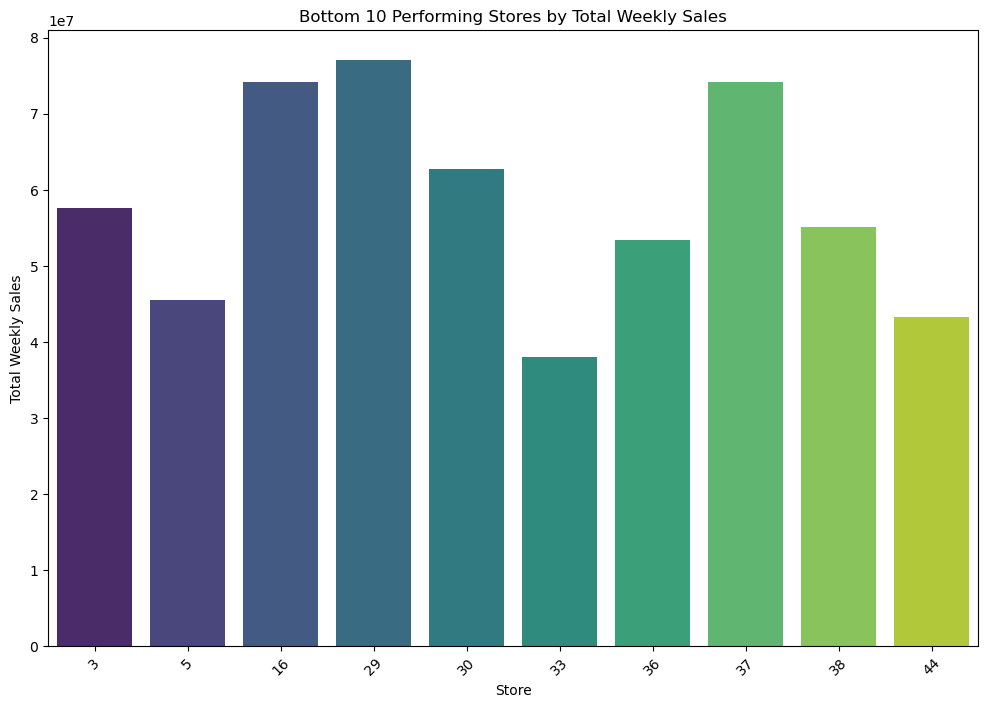

In [51]:
# Plotting the worst performing stores
plt.figure(figsize=(12, 8))
sns.barplot(data=worst_stores.tail(10), x='Store', y='Total_Weekly_Sales', palette='viridis')
plt.title('Bottom Performing Stores by Total Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=45)
plt.show()

In [67]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [68]:
# Predictive Modelling
# Preparing the data
X = walmart_data.drop(['Weekly_Sales', 'Date'], axis=1)
y = walmart_data['Weekly_Sales']

In [69]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [71]:
# Predicting the sales
y_pred = model.predict(X_test)

In [72]:
# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 262041900136.17093
R-squared Score: 0.15115146840857707


In [73]:
# Forecasting the sales for the next 12 weeks using Exponential Smoothing
model_es = ExponentialSmoothing(walmart_data['Weekly_Sales'], seasonal='add', seasonal_periods=52).fit()
forecast = model_es.forecast(12)
print("Sales forecast for next 12 weeks:\n", forecast)

Sales forecast for next 12 weeks:
 6435    745618.758725
6436    747440.493369
6437    747238.128420
6438    845433.866610
6439    808462.392477
6440    858839.558466
6441    874419.607565
6442    947234.524977
6443    790003.741113
6444    876251.336507
6445    865571.134584
6446    864142.441797
dtype: float64


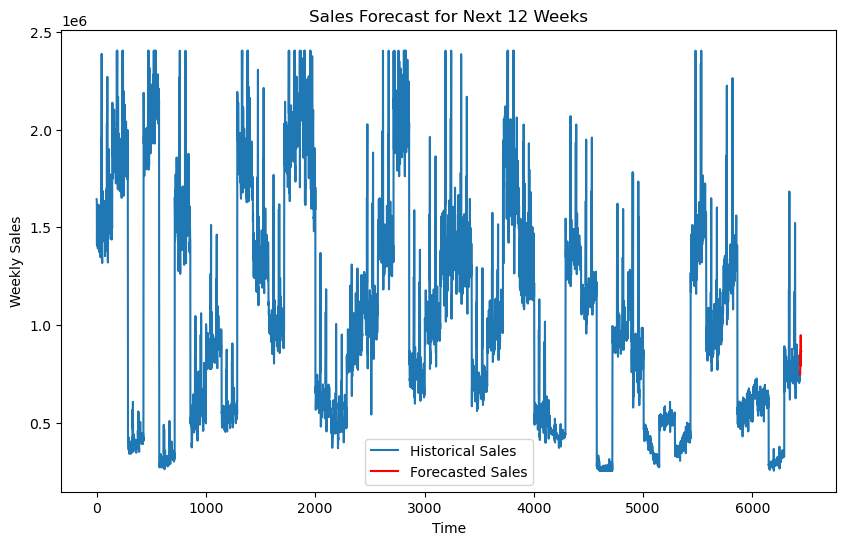

In [74]:
# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(walmart_data['Weekly_Sales'], label='Historical Sales')
plt.plot(forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast for Next 12 Weeks')
plt.xlabel('Time')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()